## Importing the necessary libraries and reading King County data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import norm


#import all potentially necessary libraries 

In [3]:
#open kc_house_data.csv and store in data variable
data = pd.read_csv('kc_house_data.csv')
data.head() #show first 5 rows.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


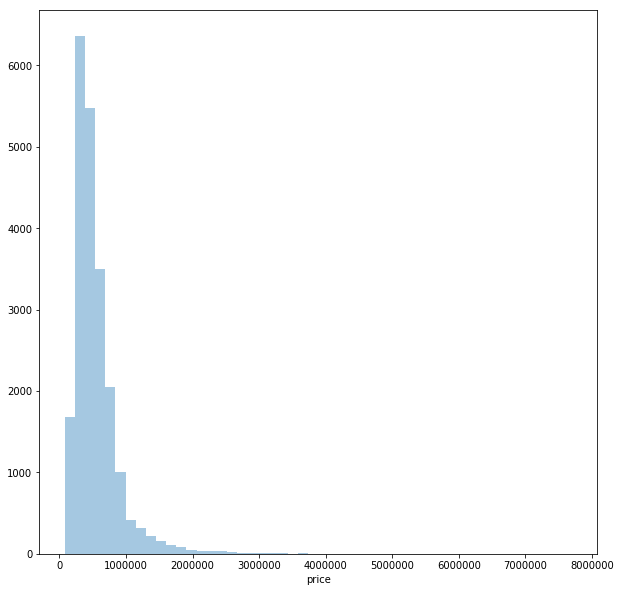

In [6]:
#Look at price distribution
plt.figure(figsize=(10,10))
sns.distplot(data['price'], kde=False)

In [4]:
#This graph shows the price is positively skewed (skewed right). Would do some normalize later on.
data.price.skew()

4.023364652271239

In [5]:
data.price.kurtosis()

34.54135857673376

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [10]:
#check for missing datas
data.isnull().values.any()

True

In [11]:
data.isnull().sum()
#check for where the missing data is. According to the result, water front is missing 2376/21597 data points, view
#is missing 63/21597 and yr_renovated is missing 3842/21597.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#There are only 63 missing values for view. 
data.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [13]:
#It seems that most of the views are 0, which means most of the house hasn't been viewed before purchase.
#I decide to fill na with the mode/median of this, which is 0
data.view = data.view.fillna(0)
data.view.isna().sum()

0

In [14]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
#i'm going to drop the id column as i think it's not necessary
data = data.drop('id', axis = 1)

In [16]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [67]:
data.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [71]:
#Does this mean these bathrooms have no shower? Would not make any sense, especially if the house have 4 bedrooms. 
data.loc[data.bathrooms == 0.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,273000.0,2,0.5,1180,7750,1.0,0.0,0.0,4,6,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
10413,109000.0,2,0.5,580,6900,1.0,0.0,0.0,3,5,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
11662,255000.0,1,0.5,880,1642,1.0,0.0,0.0,3,6,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992
12029,312500.0,4,0.5,2300,5570,2.0,0.0,0.0,3,8,?,1996,NaN,98092,47.3285,-122.168,1820,6371


In [ ]:
#Since there are only 4 results with 0.5 bathrooms, i'm going to drop them.

In [79]:
data = data.drop(data.index[[2259,10413,11662,12029]])

In [80]:
data.loc[data.bathrooms == 0.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [81]:
data.bedrooms.describe()

count    21593.000000
mean         3.373408
std          0.926140
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [83]:
data.loc[data.bedrooms == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


Looking at this, it seems that the bedroom number has been mistaken to be 33. will change back to 3.

In [86]:
data.bedrooms[15856]= 3

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
data.bedrooms[15856]

3

### Assumption 1: Time/season of the year affect the sales price greatly?
According to Investopia, the busiest time of the year for Real Estate are the months of June and July, while sales are lowest during the holidays , which are the month of January to December. I want to investigate the correlation of this to the sale price of King County.

In [17]:
#converting date time date from string to datetime 
data.date = pd.to_datetime(data.date, format = '%m/%d/%Y')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [18]:
month=[]
for i in range(len(data.date)):
    month.append(data.date[i].month)


In [19]:
data['month']=month

In [20]:
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,6
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1
8,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4
9,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,3


In [21]:
group_month_price=data.groupby(['month'])['price'].mean()

Text(0.5, 1.0, 'Average Sales price to month')

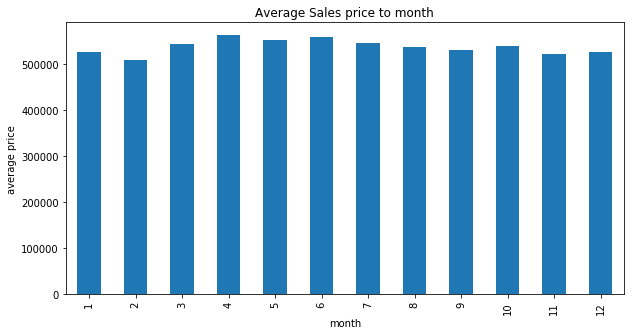

In [22]:
group_month_price.plot('bar', figsize=([10,5]))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('Average Sales price to month')

In [23]:
season = []
for i in range(len(data.date)):
    if data.date[i].month ==3 or data.date[i].month==4 or data.date[i].month==5:
        season.append('spring')
    elif data.date[i].month==6 or data.date[i].month==7 or data.date[i].month==8:
        season.append('summer')
    elif data.date[i].month==9 or data.date[i].month==10 or data.date[i].month==11:
        season.append('fall')
    else:
        season.append('winter')

In [24]:
data['season']=season
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,winter
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,winter


In [25]:
grouped_season=data.groupby(['season'])['price'].mean()

Text(0.5, 1.0, 'Sales by Season')

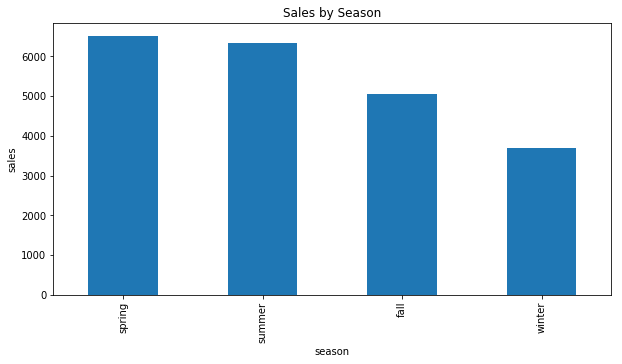

In [26]:
sales_by_season = data.season.value_counts()
sales_by_season.plot('bar', figsize=([10,5]))
plt.xlabel('season')
plt.ylabel('sales')
plt.title('Sales by Season')

Text(0.5, 1.0, 'Average Sales price to season')

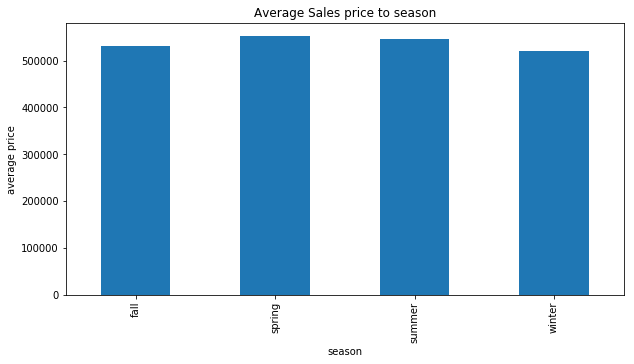

In [27]:
grouped_season.plot('bar', figsize=([10,5]))
plt.xlabel('season')
plt.ylabel('average price')
plt.title('Average Sales price to season')

It seems that there's not really a relationship between the month/season and the sales price. Interestingly, the number of sales is the highest during Spring and Summer, and falls in autumn and plummets greatly in the winter. I anticipated that during the periods of time where sales are higher, the prices would be higher; However, that is not the case here, and the average price remains relatively constant throughout the season as sales number varies greatly.

### DATA EXPLORATION AND CLEANING
Looking at different variables and determining their relationship to sales price.

In [66]:
#identifying multicolinearity
abs(data.corr())>0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False


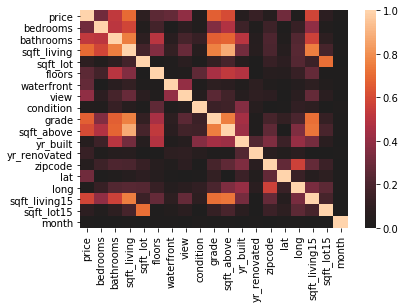

In [29]:
sns.heatmap(abs(data.corr()), center=0);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25ee1d68>,
      dtype=object)

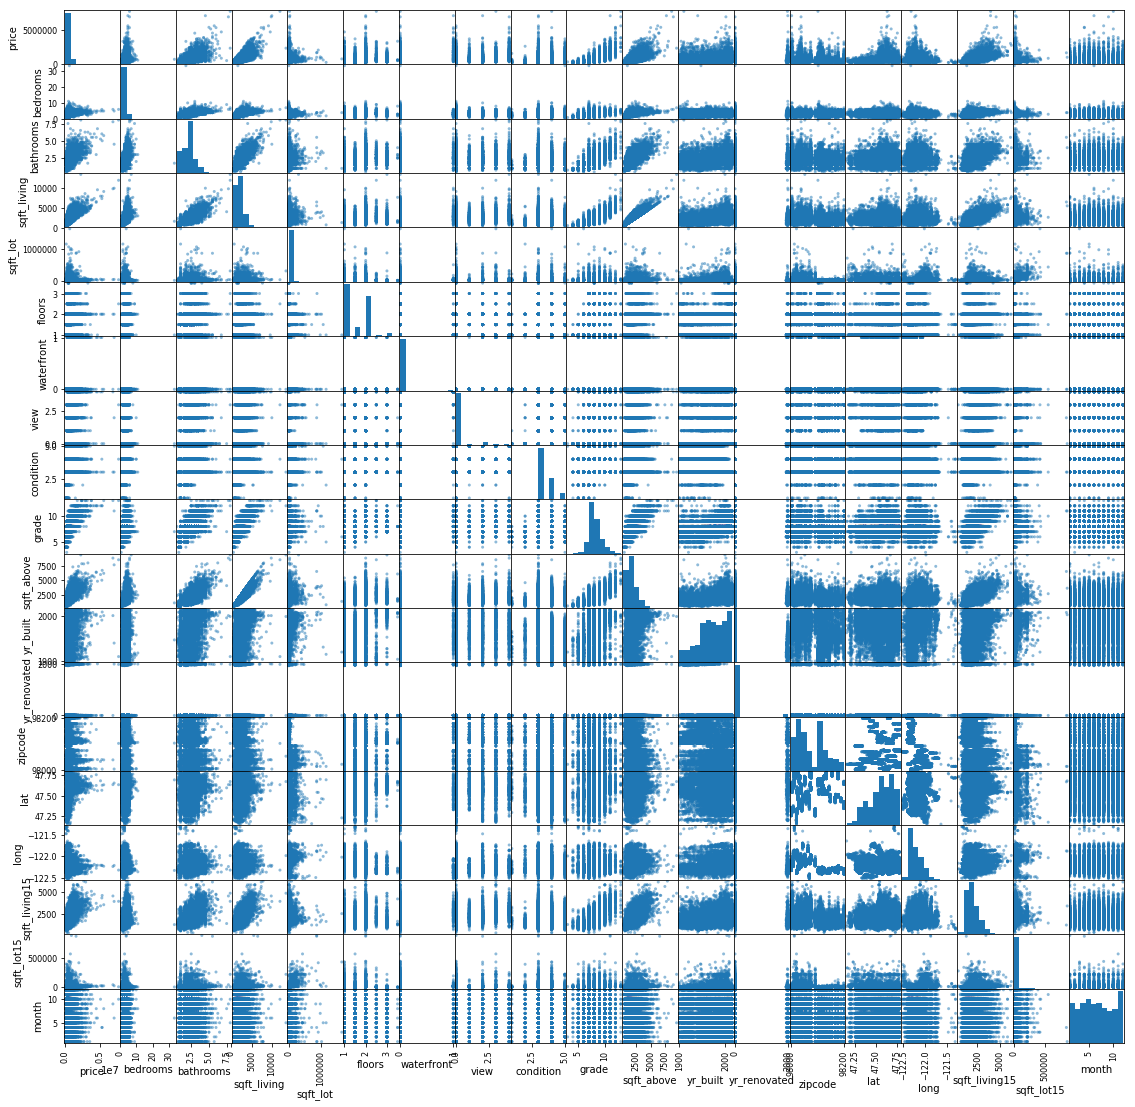

In [30]:
pd.plotting.scatter_matrix(data,figsize  = [19, 19])

This heat map really shows that there's not any correlation between month and sales price. I'll just drop the date time columns now

In [31]:
data = data.drop(['month','season','date'], axis=1)

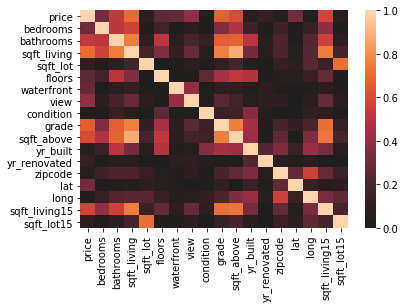

In [32]:
sns.heatmap(abs(data.corr()), center=0);

## Assumption 2: Price is positively correlated to the size of the house.

In [33]:
f_sqft_above='price~sqft_above'
model_above=ols(formula = f_sqft_above, data=data).fit()
model_above.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:30:19   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

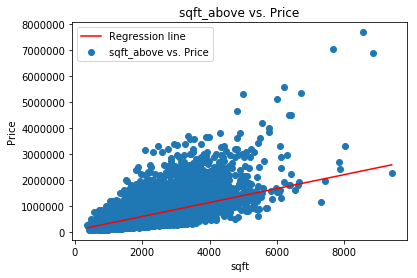

In [34]:
plt.scatter(data['sqft_above'], data['price'], label= 'sqft_above vs. Price')
plt.xlabel('sqft')
plt.ylabel('Price')
x_new_above = pd.DataFrame({'sqft_above':[data['sqft_above'].min(), data['sqft_above'].max()]})
predict_above = model_above.predict(x_new_above)
plt.plot(x_new_above, predict_above, color='red', label='Regression line')
plt.legend()
plt.title('sqft_above vs. Price')
plt.show()

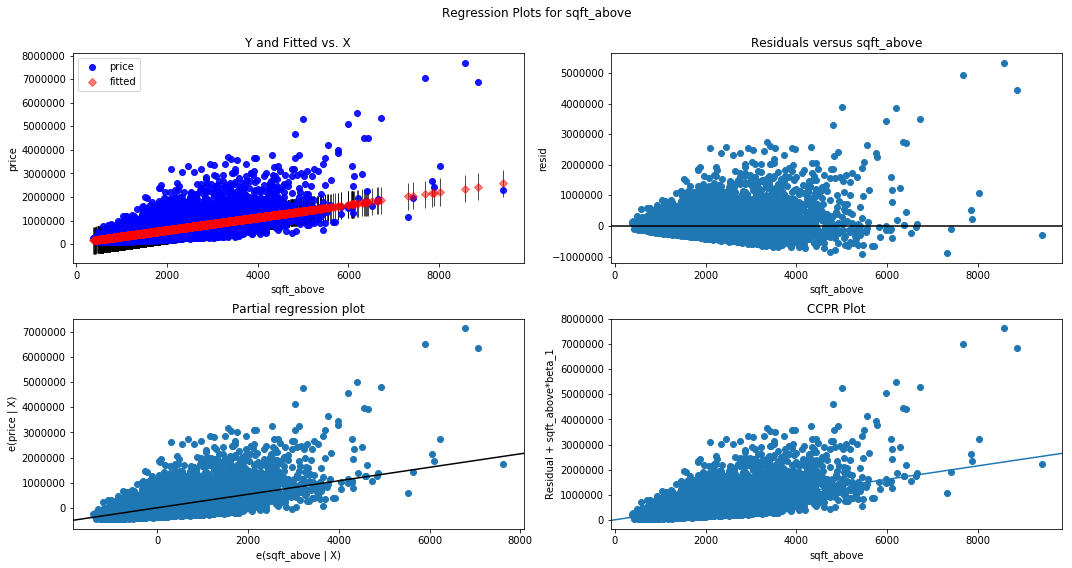

In [35]:
#Visualizing error for variance and heteroscedasity.
fig_above = plt.figure(figsize=(15,8))
fig_above = sm.graphics.plot_regress_exog(model_above, "sqft_above", fig=fig_above)
plt.show()

It is very clear that this is not homoscedastic, which makes it not a very great predictor for sales price despite showing slight trend of positive correlation. 

As we see on the warning of the OSL result, as well as the heat map, there might be an issue of multicolinearity. It seems that sqft_above and sqft_living are high correlated with |r|= 0.87. I will run another regression to see which variable is a better fit for price prediction, and drop the other.

In [36]:
f='price~sqft_living'
model = ols(formula = f, data = data).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:30:38   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

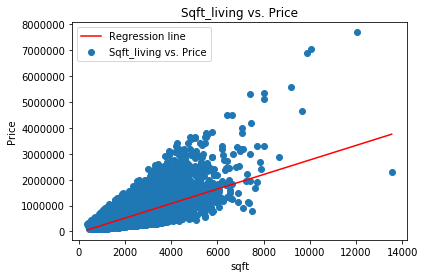

In [38]:
plt.scatter(data['sqft_living'], data['price'], label= 'Sqft_living vs. Price')
plt.xlabel('sqft')
plt.ylabel('Price')
x_new = pd.DataFrame({'sqft_living':[data['sqft_living'].min(), data['sqft_living'].max()]})
predict = model.predict(x_new)
plt.plot(x_new, predict, color='red', label='Regression line')
plt.legend()
plt.title('Sqft_living vs. Price')
plt.show()

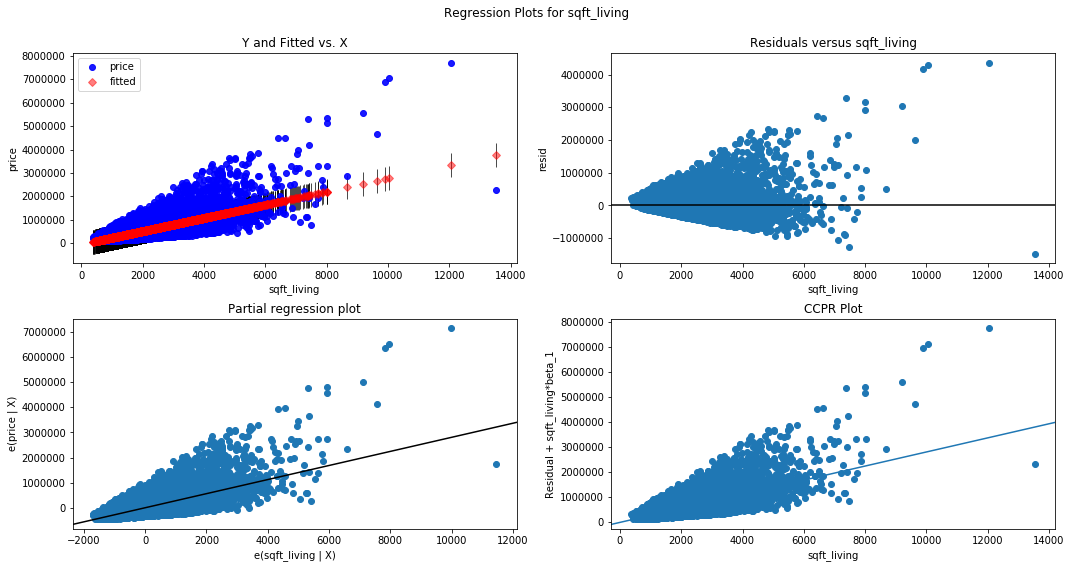

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

Sqft_living provides a better R^2 at 0.493 in comparion os 0.366 for sqft_above, but the regressiong plots are still very heteroscedastic, which shows that it's not as great of a predictor as I anticipated. 

Since I'm curios about the effect of multicolinearity on sales price, I'll just rerun this with both sqft_living and sqft_above

In [40]:
f_above_living = 'price~sqft_living+sqft_above'
model_above_living = ols(formula = f_above_living, data = data).fit()
model_above_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        15:30:51   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+04   4455.441     -9.262      0.000      -5e+04   -3.25e+04
sqft_living   295.7265      4.026     73.448      0.000     287.835     303.618
sqft_above    -18.8097      4.466     -4.212      0.000     -27.563     -10.056
==============================================================================
Omnibus:                    14762.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539868.557
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      26.841   Cond. No.                     7.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R^2 remains the same at 0.493, but the condition number shot up to 7.49e+03. Therefore, I'll drop the sqft_above column

In [41]:
#dropping sqft_above column
data = data.drop('sqft_above', axis = 1)

In [42]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I want to see what are the most highly correlated variables to price. 

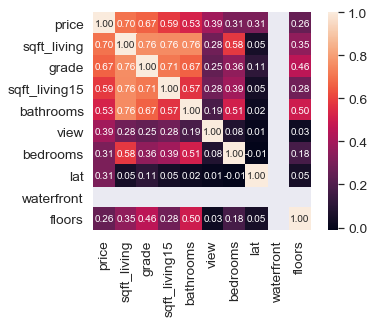

In [43]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = abs(data.corr()).nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Why is waterfront whiteout? Probably due to missing values 

In [44]:
data.waterfront = data.waterfront.fillna(0)

In [45]:
data.waterfront.isna().sum()

0

In [46]:
data.waterfront.unique()

array([0., 1.])

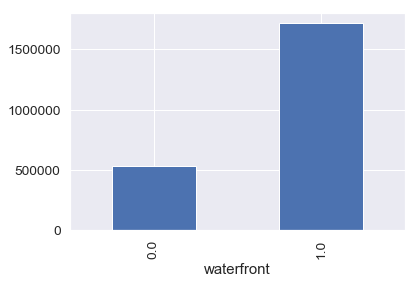

In [47]:
grouped_waterfront = data.groupby(['waterfront'])['price'].mean()
grouped_waterfront.plot('bar')


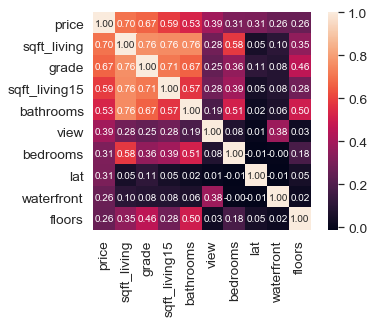

In [48]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = data.corr().nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

It seems that sqft_living, grade(how good the house is), and bathrooms are highly correlated with sales price of  particular houses. 

There's also high correlation between living space, grade and bathrooms, which makes sense as the more bathrooms the bigger the living square feet. However, does having a bigger house equate to a higher grade?

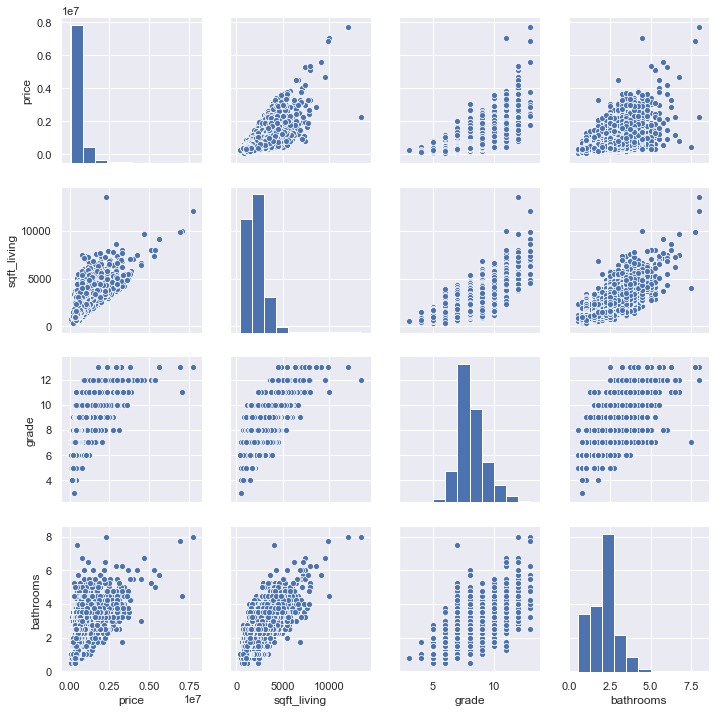

In [64]:
sns.set()
cols = ['price', 'sqft_living', 'grade', 'bathrooms']
sns.pairplot(data[cols], height = 2.5)
plt.show()

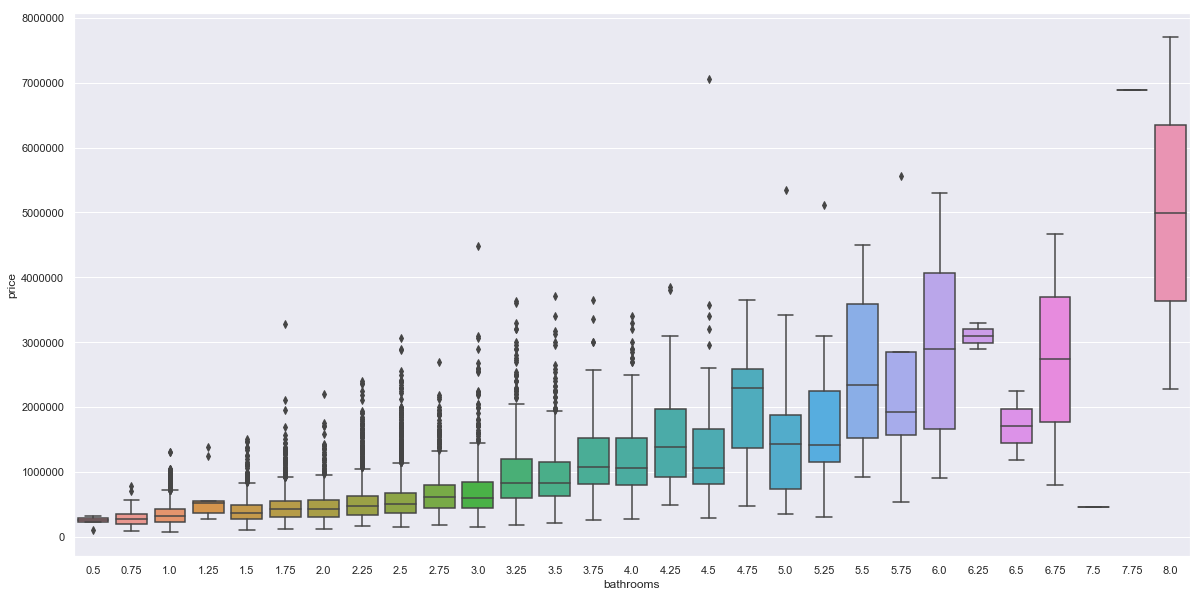

In [57]:
#Looking at this, we can see that the heatmap is pretty correct with positive correlations. 
#Now, will be looking at dispersion of the data.
plt.figure(figsize=(20,10))
sns.boxplot(y=data.price, x=data.bathrooms, data=data)

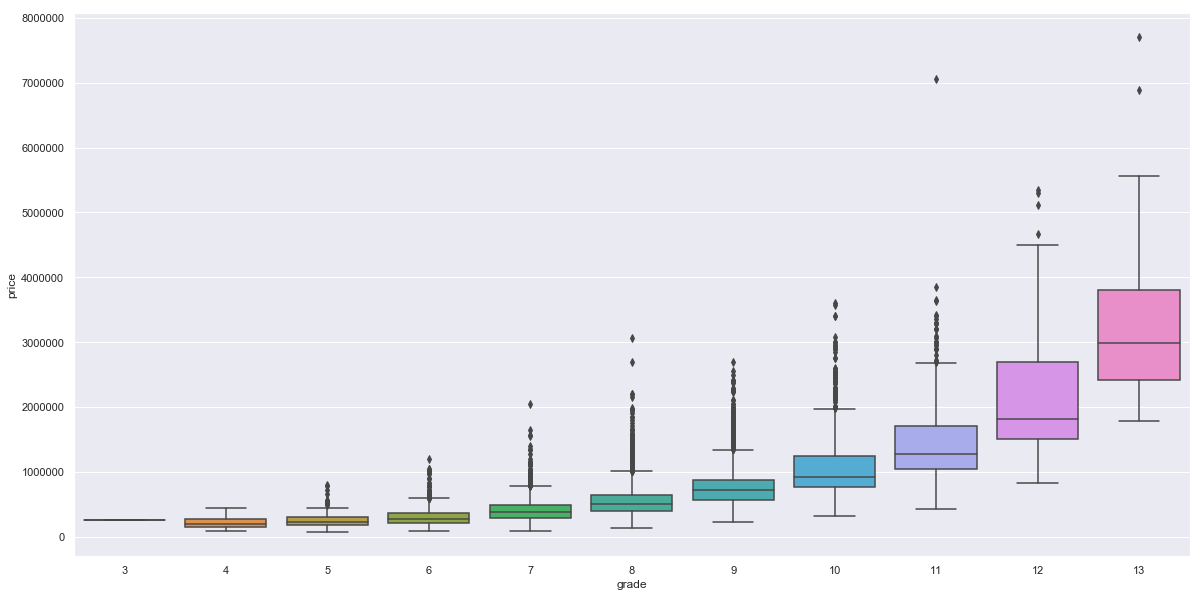

In [58]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data.grade, y=data.price, data=data)

## It's clear that the more bathroom there are and the higher the grade, the higher the price. There's a clear linear relationship between grade and number of bathroom. Surprisingly, number of bedroom wasn't as good of an indicator of price as bathrooms, and there is not as strong of a correlation between the price and bedroom numbers


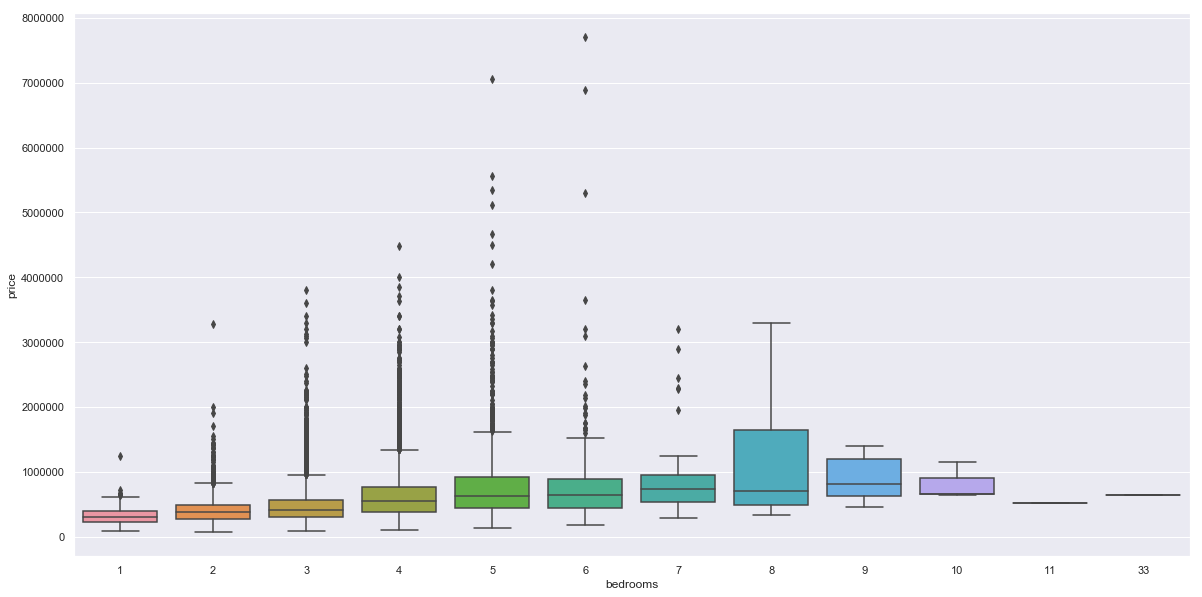

In [59]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data.bedrooms, y=data.price, data=data)

## According the box plot above, the sales price remains rather constant despite the bedroom increase, which leads me to wonder what the correlation between bedrooms and living square feet.

In [61]:
#regression between bedroom and square feet living
f_bed_living = 'bedrooms~sqft_living'
model_bed_living=ols(formula = f_bed_living, data=data).fit()
model_bed_living.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bedrooms   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        16:07:19   Log-Likelihood:                -24596.
No. Observations:               21597   AIC:                         4.920e+04
Df Residuals:                   21595   BIC:                         4.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1596      0.013    169.547      0.000       2.135       2.185
sqft_living     0.0006    5.6e-06    104.144      0.000       0.001       0.001
==============================================================================
Omnibus:                    19579.742   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12007097.553
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                     118.313   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

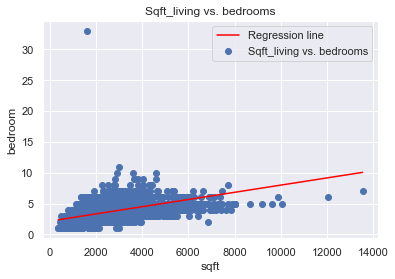

In [62]:
plt.scatter(data['sqft_living'], data['bedrooms'], label= 'Sqft_living vs. bedrooms')
plt.xlabel('sqft')
plt.ylabel('bedroom')
x_new_bed_living = pd.DataFrame({'sqft_living':[data['sqft_living'].min(), data['sqft_living'].max()]})
predict_bed_living = model_bed_living.predict(x_new_bed_living)
plt.plot(x_new_bed_living, predict_bed_living, color='red', label='Regression line')
plt.legend()
plt.title('Sqft_living vs. bedrooms')
plt.show()

Interestingly, we can see a clear linearity between bedrooms and square feet living. 

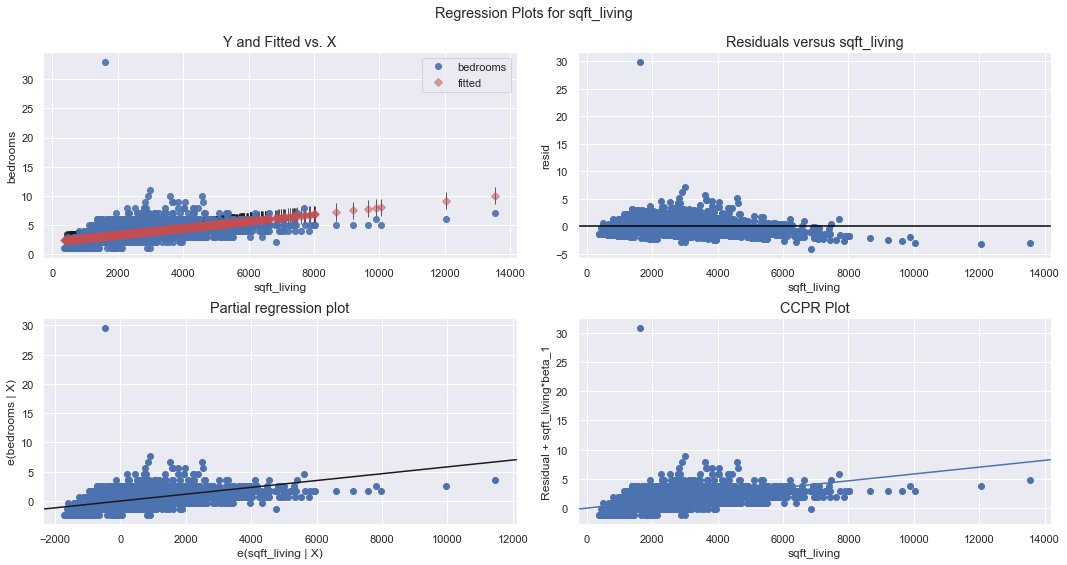

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_bed_living, "sqft_living", fig=fig)
plt.show()

### Scaling and Normalization

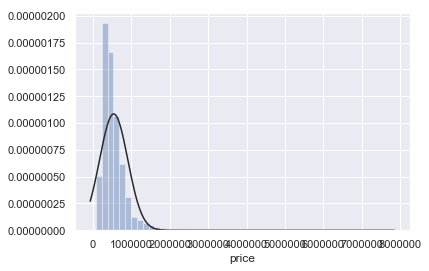

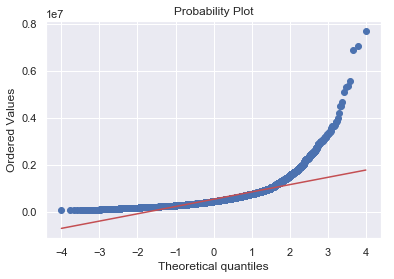

In [97]:
#replotting price distribution
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [99]:
#applying log transformation to sale price
data.price = np.log(data.price)

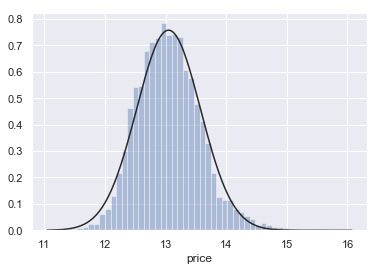

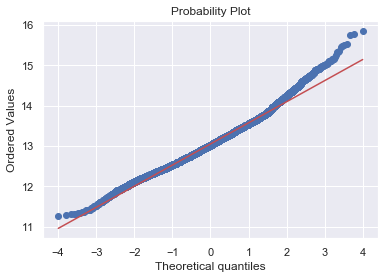

In [100]:
sns.distplot(data['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

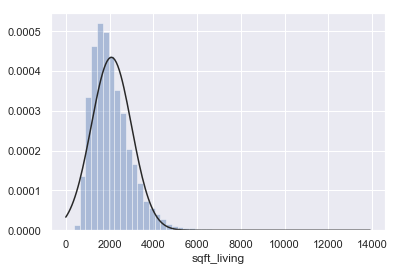

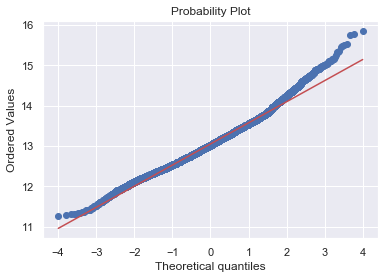

In [101]:
#plotting living sqft distribution
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [ ]:
#The QQ plot here is actually quite good, only showing a light tail on the right corner. However, we will apply log transformation to get a more normal distribution

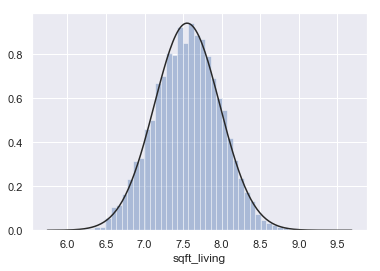

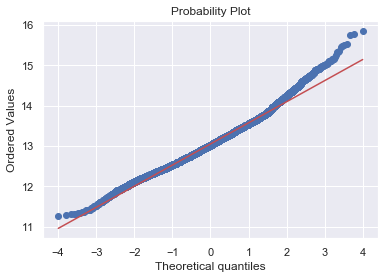

In [102]:
data.sqft_living = np.log(data.sqft_living)
sns.distplot(data['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [103]:
#Now both are normally distributed, we expect the fit to be much better.
f1 = 'price~sqft_living'
model1= ols(formula=f1, data=data).fit()

In [104]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.804e+04
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        23:11:09   Log-Likelihood:                -10229.
No. Observations:               21593   AIC:                         2.046e+04
Df Residuals:                   21591   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7244      0.047    142.587      0.000       6.632       6.817
sqft_living     0.8375      0.006    134.309      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.331   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.873
Skew:                           0.143   Prob(JB):                     1.87e-25
Kurtosis:                       2.788   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

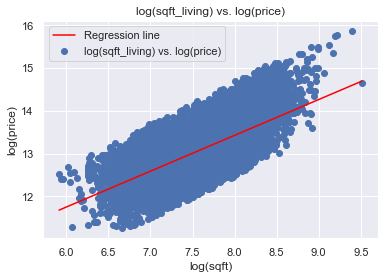

In [117]:
plt.scatter(data['sqft_living'], data['price'], label= 'log(sqft_living) vs. log(price)')
plt.xlabel('log(sqft)')
plt.ylabel('log(price)')
x_new1 = pd.DataFrame({'sqft_living':[data['sqft_living'].min(), data['sqft_living'].max()]})
predict1 = model1.predict(x_new1)
plt.plot(x_new1, predict1, color='red', label='Regression line')
plt.legend()
plt.title('log(sqft_living) vs. log(price)')
plt.show()

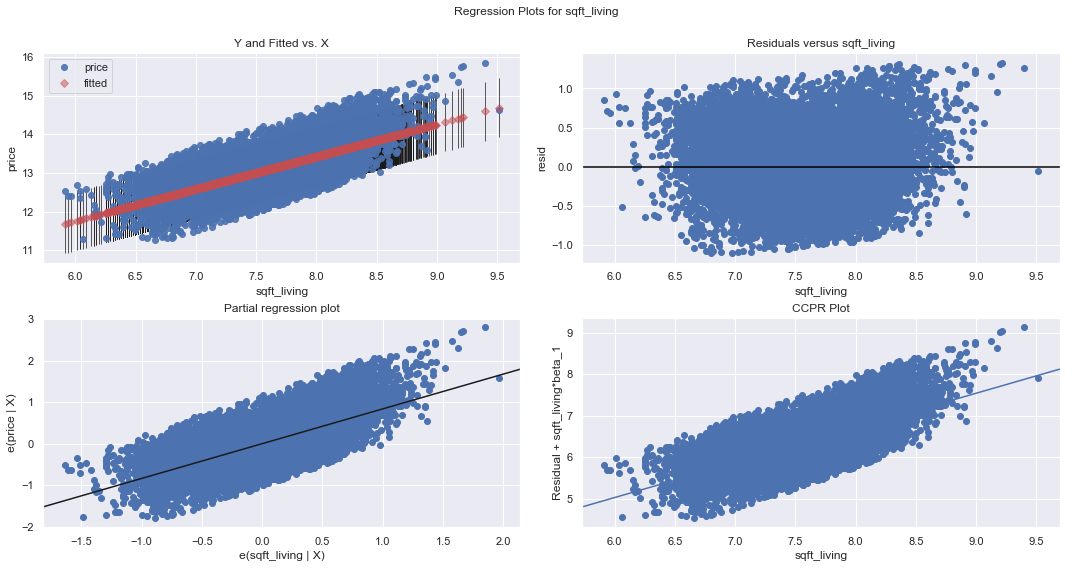

In [106]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "sqft_living", fig=fig)
plt.show()

In [107]:
#this shows a much better linearity. The residual plots also shows a good random residual, which accepts the
#assumption of linearity. Therefore, we can say that log(sqft_living) is a good predictor for log(price), which 
#we can use to predict the actual price. 

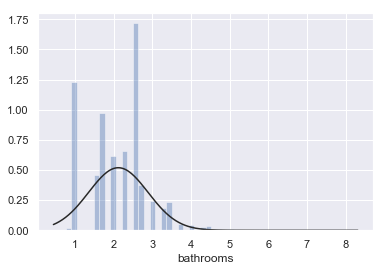

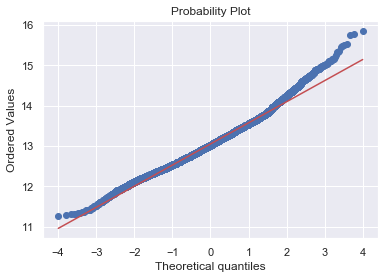

In [108]:
#going to scatter plot bathroom distribution
sns.distplot(data['bathrooms'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

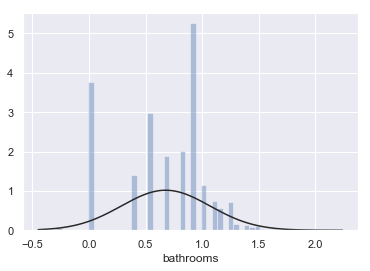

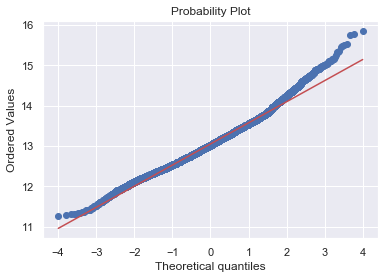

In [109]:
data.bathrooms = np.log(data.bathrooms)
sns.distplot(data['bathrooms'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)

In [128]:
#I'm adding bathrooms, 
#seems that the adjusted r-squared is unchanged. The p-value is still under 0.05, but more significant than others
f2='price~sqft_living+bathrooms'
model2=ols(formula=f2, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     9023.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:15:47   Log-Likelihood:                -10227.
No. Observations:               21593   AIC:                         2.046e+04
Df Residuals:                   21590   BIC:                         2.048e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8228      0.067    101.205      0.000       6.691       6.955
sqft_living     0.8226      0.010     85.586      0.000       0.804       0.841
bathrooms       0.0212      0.010      2.044      0.041       0.001       0.042
==============================================================================
Omnibus:                      127.432   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.041
Skew:                           0.147   Prob(JB):                     2.33e-26
Kurtosis:                       2.787   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:

f3='price~sqft_living+bathrooms+grade'
model3=ols(formula=f3, data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     8748.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:17:29   Log-Likelihood:                -8196.4
No. Observations:               21593   AIC:                         1.640e+04
Df Residuals:                   21589   BIC:                         1.643e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9183      0.064    124.661      0.000       7.794       8.043
sqft_living     0.4767      0.010     46.894      0.000       0.457       0.497
bathrooms      -0.0957      0.010     -9.941      0.000      -0.115      -0.077
grade           0.2084      0.003     66.835      0.000       0.202       0.214
==============================================================================
Omnibus:                       83.158   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.708
Skew:                           0.148   Prob(JB):                     6.65e-19
Kurtosis:                       2.928   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
f4='price~sqft_living+grade'
model4=ols(formula=f4, data=data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                 1.301e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:18:02   Log-Likelihood:                -8245.7
No. Observations:               21593   AIC:                         1.650e+04
Df Residuals:                   21590   BIC:                         1.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.3174      0.049    168.593      0.000       8.221       8.414
sqft_living     0.4209      0.008     49.531      0.000       0.404       0.438
grade           0.2027      0.003     65.980      0.000       0.197       0.209
==============================================================================
Omnibus:                      108.923   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.889
Skew:                           0.170   Prob(JB):                     1.37e-24
Kurtosis:                       2.917   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""